# Assignment: Trees in forest of fishing attacks

## Assignment Understanding

 Phishing attacks are the most common type of cyber-attacks used to obtain sensitive information and have been affecting individuals as well as organizations across the globe. We assume that Decision tree and random forest might be effective for protecting users as automated system that can <del>somehow</del> reliably identify phishing websites. It might be especially useful as sheer volume of new websites created daily makes it unrealistic to manually detect these malicious sites.

Therefore, our primary goal is to develop a predictive model based on <del>lumberjack</del> decision trees concept and verify that can automatically and accurately classify a website as either legitimate or a phishing - based on a set of observable characteristics. Transparency and readability as well as predictive performance are main objectives that we are aiming for during development.



## Data Understanding

To build our models, we will use the [Phishing Websites Data Set](https://archive.ics.uci.edu/dataset/327/phishing+websites) from the UCI Machine Learning Repository. This dataset contains 11,055 instances (*websites*), each described by 30 features (*extracted from the website's URL and source code*) and a Result target variable.

**The target variable**, `Result`, is binary:

* `-1`: Phishing website.
* `1`: Legitimate website.

**The Features** are categorical, represented by the values `{-1, 0, 1}`.

* `-1`: Indicates the presence of a phishing characteristic.
* `1`: Indicates the presence of a legitimate characteristic.
* `0`: Can be interpreted as a neutral or suspicious state.

**Detailed descriptions:**

| Feature Name               | Description | Values |
|-----------------------------|-------------|--------|
| having_ip_address           | Checks if an IP address is used instead of a domain name in the URL. | Legitimate (1), Phishing (-1) |
| url_length                  | Length of the URL; long URLs may hide suspicious parts. | Legitimate (1), Suspicious (0), Phishing (-1) |
| shortining_service          | Whether a URL shortening service (e.g., bit.ly) is used. | Legitimate (1), Phishing (-1) |
| having_at_symbol            | Presence of “@” symbol in the URL, which can obscure the true address. | Legitimate (1), Phishing (-1) |
| double_slash_redirecting    | Presence and location of “//” in the URL path (may redirect). | Legitimate (1), Phishing (-1) |
| prefix_suffix               | Usage of “-” in the domain (rare in legitimate URLs). | Legitimate (1), Phishing (-1) |
| having_sub_domain           | Count of subdomains in the URL; multiple subdomains can be suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sslfinal_state              | Presence and validity of HTTPS/SSL certificate. | Legitimate (1), Suspicious (0), Phishing (-1) |
| domain_registration_length  | Domain age based on WHOIS info; short-lived domains are suspicious. | Legitimate (1), Phishing (-1) |
| favicon                     | Whether favicon is loaded from another domain. | Legitimate (1), Phishing (-1) |
| port                        | Usage of non-standard or uncommon ports. | Legitimate (1), Phishing (-1) |
| https_token                 | Presence of misleading “https” token in the domain part of the URL. | Legitimate (1), Phishing (-1) |
| request_url                 | External objects (images, videos, etc.) loaded from another domain. | Legitimate (1), Phishing (-1) |
| url_of_anchor               | Examines `<a>` tags; empty or irrelevant anchors are suspicious. | Legitimate (1), Suspicious (0), Phishing (-1) |
| links_in_tags               | Links in `<Meta>`, `<Script>`, `<Link>` tags pointing outside the domain. | Legitimate (1), Suspicious (0), Phishing (-1) |
| sfh                         | Server Form Handler — empty or mismatched domain in forms. | Legitimate (1), Suspicious (0), Phishing (-1) |
| submitting_to_email         | Whether forms submit data directly to an email address. | Legitimate (1), Phishing (-1) |
| abnormal_url                | Whether the URL identity mismatches WHOIS information. | Legitimate (1), Phishing (-1) |
| redirect                    | Number of redirects the page performs. | Legitimate (1), Suspicious (0) |
| on_mouseover                | JavaScript that changes status bar on hover (hides true URL). | Legitimate (1), Phishing (-1) |
| rightclick                  | JavaScript disabling right-click (prevents source inspection). | Legitimate (1), Phishing (-1) |
| popupwindow                 | Usage of pop-up windows requesting user information. | Legitimate (1), Phishing (-1) |
| iframe                      | Presence of hidden iframes in the page. | Legitimate (1), Phishing (-1) |
| age_of_domain               | Domain age from WHOIS records (short-lived → suspicious). | Legitimate (1), Phishing (-1) |
| dnsrecord                   | Existence of DNS records for the domain. | Legitimate (1), Phishing (-1) |
| web_traffic                 | Website popularity/traffic from Alexa ranking. | Legitimate (1), Suspicious (0), Phishing (-1) |
| page_rank                   | PageRank score of the website (legitimacy indicator). | Legitimate (1), Phishing (-1) |
| google_index                | Whether the site is indexed by Google. | Legitimate (1), Phishing (-1) |
| links_pointing_to_page      | Number of external links pointing to the webpage. | Legitimate (1), Suspicious (0), Phishing (-1) |
| statistical_report          | Matches domains/IPs from phishing blacklists (PhishTank, StopBadware). | Legitimate (1), Phishing (-1) |

## Data preparation

### Data import and Check

For this assignment, the data is loaded directly from the UCI repository using the ucimlrepo library. This approach is more standard and reproducible than manually downloading the data files as we previously did.

In [264]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI repository
phishing_websites = fetch_ucirepo(id=327)

# Extract features (X) and the target variable (y)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# --- Target Variable Summary ---
print("\n--- Target Quality and Value Summary ---\n")
target_summary_df = pd.DataFrame(y.columns, columns=['Variable']) # Create a summary DataFrame to display data quality checks
target_summary_df['Data Type'] = y.dtypes.values
target_summary_df['Missing Values'] = y.isnull().sum().values # Add a column for the count of missing values
target_summary_df['Unique Values'] = [', '.join(map(str, y[col].unique())) for col in y.columns] # Add a column for the unique values, converting them to strings for consistent display
target_summary_df.set_index('Variable', inplace=True) # Set the feature name as the index for a clean, transposed view
display(target_summary_df)

# --- Features Summary ---
print("\n--- Features Quality and Value Summary ---\n")
features_summary_df = pd.DataFrame(X.columns, columns=['Feature'])
features_summary_df['Data Type'] = X.dtypes.values
features_summary_df['Missing Values'] = X.isnull().sum().values
features_summary_df['Unique Values'] = [', '.join(map(str, X[col].unique())) for col in X.columns]
features_summary_df.set_index('Feature', inplace=True)
display(features_summary_df)



--- Target Quality and Value Summary ---



,Data Type,Missing Values,Unique Values
Variable,,,
result,int64,0,"-1, 1"



--- Features Quality and Value Summary ---



,Data Type,Missing Values,Unique Values
Feature,,,
having_ip_address,int64,0,"-1, 1"
url_length,int64,0,"1, 0, -1"
shortining_service,int64,0,"1, -1"
having_at_symbol,int64,0,"1, -1"
double_slash_redirecting,int64,0,"-1, 1"
prefix_suffix,int64,0,"-1, 1"
having_sub_domain,int64,0,"-1, 0, 1"
sslfinal_state,int64,0,"-1, 1, 0"
domain_registration_length,int64,0,"-1, 1"


The data appears to be clean with no missing values. All 30 features and target variable are in place and align with the description. The values are numerical and already encoded, so no further categorical encoding is needed.


### Splitting data

Our primary data preparation step is to split the data into training and testing sets. We will use a 70/30 split, where 70% of the data is used for training the models and 30% is reserved for testing. We'll set a `random_state` to ensure that the split is reproducible.

In [265]:
from sklearn.model_selection import train_test_split

# Do the 70/30 data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 During initial model fitting, we encountered a `DataConversionWarning` from scikit-learn. To resolve this, we use `.squeeze()` to convert y_train and y_test from column-vector to 1D array format.

*In other words target `y` need to be passed as `[array, of, objects]` instead of single column table.*

In [266]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [267]:
# Useful variable for future
randomstate = 42

print("\n--- DoubleCheck of (rows, columns) ---\n")
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


--- DoubleCheck of (rows, columns) ---

Training set shape (X_train): (7738, 30)
Testing set shape (X_test): (3317, 30)
Training target shape (y_train): (7738,)
Testing target shape (y_test): (3317,)


## Modeling

### Part 1: Decision Tree
We will use a DecisionTreeClassifier for our initial model. This algorithm builds a tree of "if-then" rules that split the data based on feature values, ultimately predicting whether a site is phishing or legitimate.

Two key hyperparameters for controlling the tree's complexity are:

* `max_depth`: This limits the maximum number of levels in the tree.
* `ccp_alpha` (Cost-Complexity Pruning): This parameter controls how much the tree is "pruned" back after it is fully grown to prevent overfitting.

To make an informed choice rather than picking a value arbitrarily, we will conduct a simple tuning experiment. Since this is primarily a learning exercise, we will focus on the max_depth hyperparameter due to its simplicity and clear impact on the model's structure. We created a loop to test tree depths from 1 to 10, evaluating each model's performance using several key metrics.

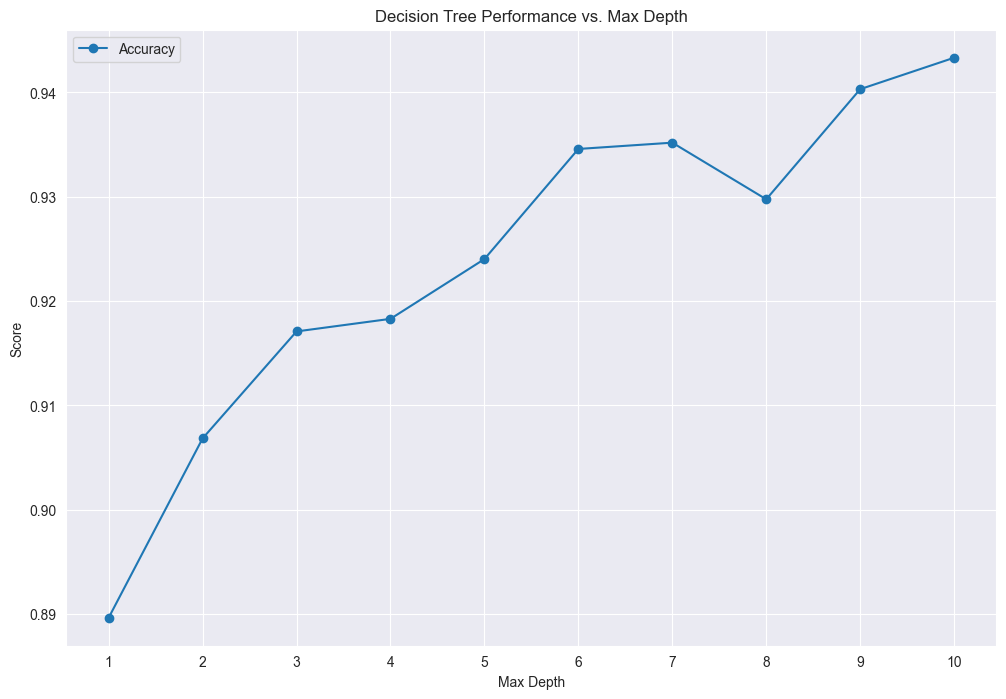

In [268]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

# --- Hyperparameter Tuning Loop for max_depth ---

# Define the range of max_depth values to test
max_depth_range = range(1, 11)  # We will test depths from 1 to 10

# Create lists to store the scores for each metric
accuracy_scores = []

# Loop through each max_depth value
for depth in max_depth_range:
    # Build the classifier with the current depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=randomstate)
    model.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate and store scores for each metric
    accuracy_scores.append(accuracy_score(y_test, y_pred))


# --- Plot the Results ---

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(max_depth_range, accuracy_scores, marker='o', linestyle='-', label='Accuracy')

plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(max_depth_range)
plt.grid(True)
plt.legend() # Add a legend to identify the lines
plt.show()

The analysis of the performance graph shows that the most significant improvements occur as the tree's `max_depth` increases from 1 to 3. Beyond a depth of 3, the gains in performance start to diminish, with the difference in metrics being less than 1% between depths 3 and 5. Although there is another noticeable improvement at a depth of 6, at this point, we become concerned about the risk of model overfitting.

Therefore, we will select a `max_depth` of 3. This choice represents a good balance between performance and simplicity. Since the goal is a transparent and understandable model, the simplicity of a smaller tree is more valuable than a marginal 1-2% gain in accuracy that comes with a much more complex model.

### Evaluation Metrics for Decision Tree Model

With our optimal hyperparameter selected, we will now train the final decision tree model. To gain a comprehensive understanding of its performance, we will evaluate it using several key metrics, including the confusion matrix, accuracy, precision, and recall.

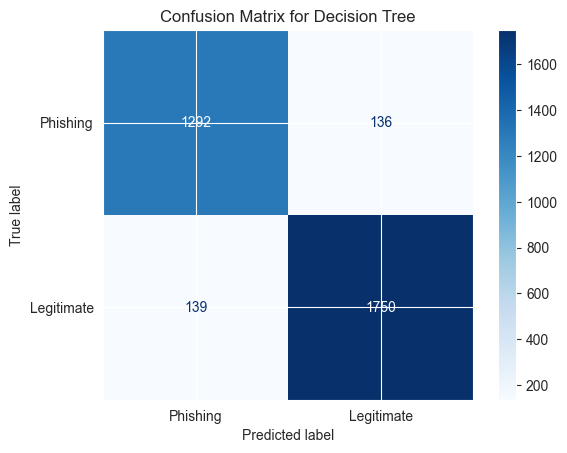


--- Evaluation Metrics for the Decision Tree ---

Accuracy:, 0.9171
Precision:, 0.9279
Recall:, 0.9264


In [269]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# build the classifier
model = DecisionTreeClassifier(random_state = randomstate, max_depth = 3)
model.fit(X_train, y_train)

# predicting with the decision tree using the test set
preds = model.predict(X_test)

# printing a confusion matrix of the results
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# print evaluation metrics
print("\n--- Evaluation Metrics for the Decision Tree ---\n")
print(f"Accuracy:, {accuracy_score(y_test, preds):.4f}")
print(f"Precision:, {precision_score(y_test, preds):.4f}")
print(f"Recall:, {recall_score(y_test, preds):.4f}")

According to the confusion matrix:

* 136 Phishing sites were misclassified as Legitimate (False Positives). This represents an error rate of approximately 9.3% for the phishing class.
* 139 Legitimate sites were misclassified as Phishing (False Negatives).

In total, the model made 3,042 correct predictions. While the Precision and Recall scores are slightly different from the Accuracy, the differences are not statistically significant in this case.

### Tree visualization

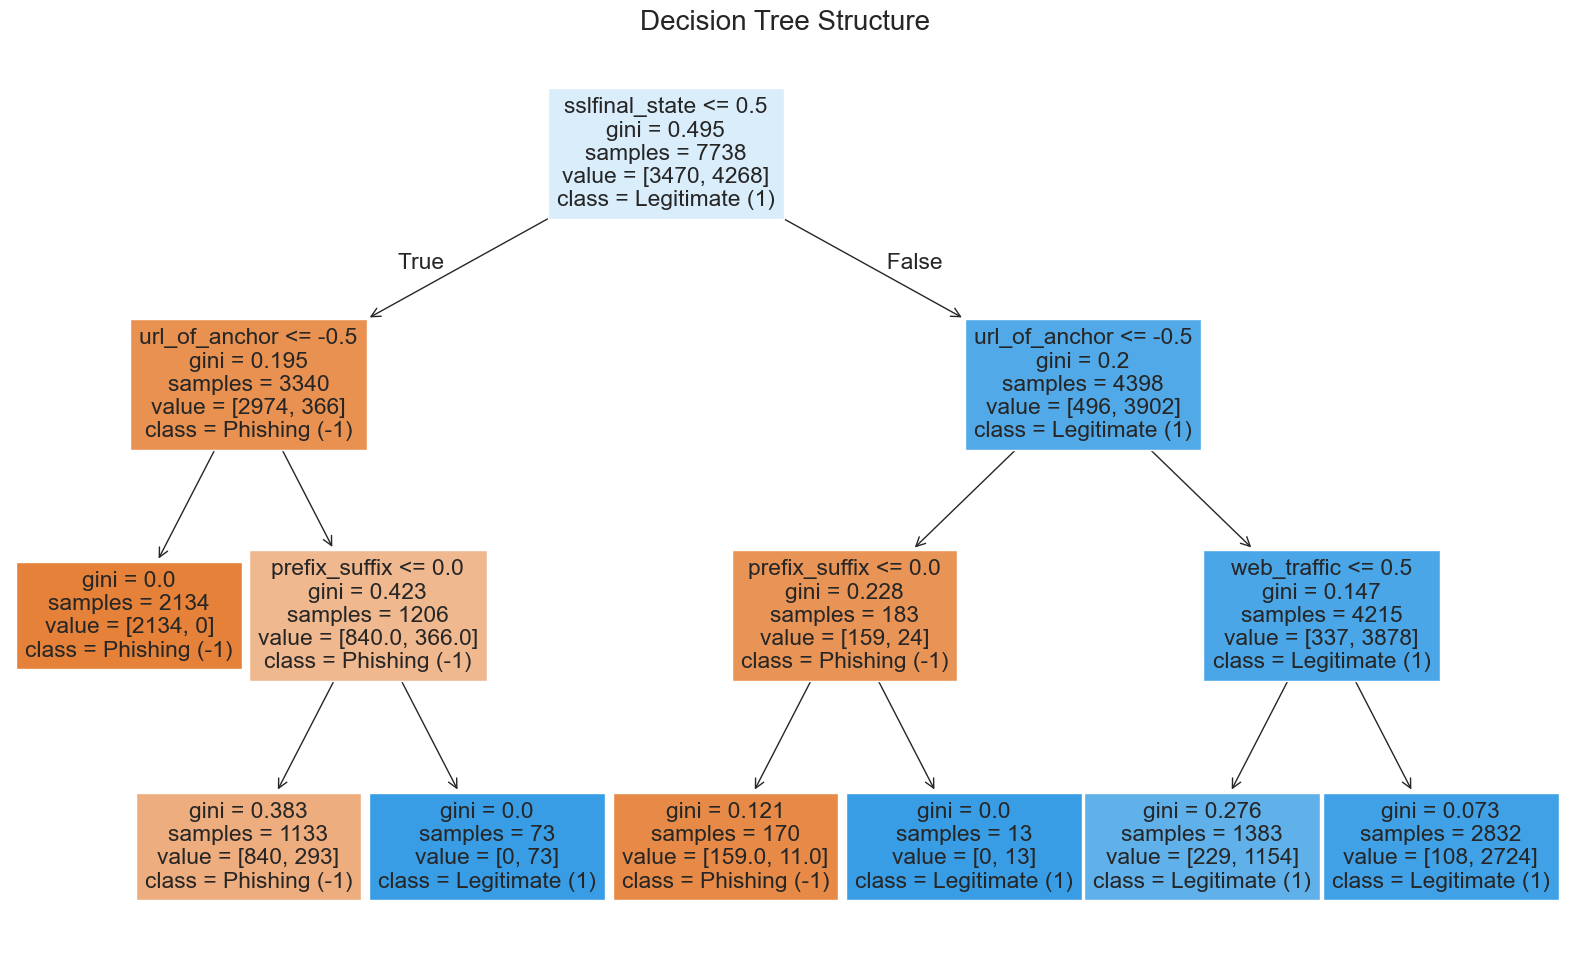

In [270]:
# create the decision tree figure
fig = plt.figure(figsize=(20, 12))
plot_tree(
    model,
    feature_names = X.keys(),
    class_names=['Phishing (-1)', 'Legitimate (1)'],
    filled=True
)
plt.title("Decision Tree Structure", fontsize=20)
plt.show()

### Instructions for an internet analyst

Based on the structure of our decision tree, here is a simplified Step-by-Step Checklist for manual check if a website is legit or not.

#### Step 1: Check the SSL Certificate
Question: Does the website have a valid and trusted SSL certificate (i.e., you see a secure padlock in the address bar and no browser warnings)?
   * If NO: STOP. The website is HIGHLY LIKELY to be a phishing site.
   * If YES: The site might be legitimate. Proceed to Step 2.

#### Step 2: Check the Links on the Page (Anchors)
Question: Do the links on the webpage seem suspicious? (For example, do they point to a different domain than the main site, or do a high percentage of links look strange or irrelevant?)
   * If YES (the links are suspicious): The website is SUSPICIOUS. Proceed to Step 3.
   * If NO (the links appear legitimate and consistent): The website is VERY LIKELY to be legitimate.

#### Step 3: Check the Domain Name for a Hyphen (for suspicious sites only)
Question: Does the domain name in the URL contain a hyphen (-)? (e.g., my-bank-online.com)
   * If YES (the domain has a hyphen): It is HIGHLY LIKELY to be a phishing site.
   * If NO (the domain does not have a hyphen): It is LIKELY legitimate, but should still be treated with caution due to the suspicious links found in Step 2.


### Part 2: Random Forest

While a single decision tree is transparent, it can be prone to overfitting. A Random Forest, which is an ensemble of many decision trees, typically provides higher accuracy and better generalization. We will now train a `RandomForestClassifier` and compare its performance to our single decision tree.

Running GridSearchCV...
Fitting 5 folds for each of 28 candidates, totalling 140 fits


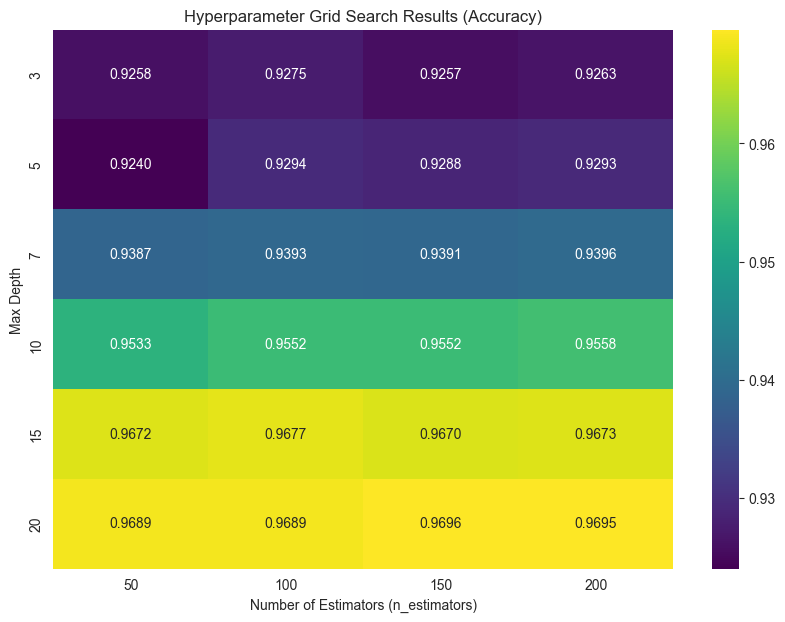


--- Automated analysis ---
GridSearchCV's 'best' parameters (highest score): {'max_depth': 20, 'n_estimators': 150}
Highest accuracy score: 0.9696


In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the base model
rf_model = RandomForestClassifier(random_state = randomstate)

# 2. Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, 15, 20, None] # A good range from simple to complex
}

# 3. Set up and run the automated grid search
grid_search = GridSearchCV(
    estimator=rf_model,         # The model to be tuned (in this case, our RandomForestClassifier).
    param_grid=param_grid,      # The dictionary of hyperparameters to test.
    cv=5,                       # The number of cross-validation folds to use (5 is a common choice).
    n_jobs=-1,                  # Use all available CPU cores to speed up the computation.
    verbose=1,                  # How much information to print during the process (1 shows some progress).
    scoring='accuracy'          # The metric to evaluate and rank the models by (we want the highest accuracy).
)

print("Running GridSearchCV...")
grid_search.fit(X_train, y_train)

# 4. Extract results into a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# 5. Visualize the results
# We will create a heatmap to see the interaction between the two hyperparameters.
scores = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

plt.figure(figsize=(10, 7))
sns.heatmap(scores, annot=True, fmt=".4f", cmap="viridis")
plt.title('Hyperparameter Grid Search Results (Accuracy)')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Max Depth')
plt.show()


# --- Print the conclusion ---
print("\n--- Automated analysis ---")
print(f"GridSearchCV's 'best' parameters (highest score): {grid_search.best_params_}")
print(f"Highest accuracy score: {grid_search.best_score_:.4f}")

The results show that the number of estimators has a minor impact on performance, though 50 is likely insufficient. To balance performance with model simplicity, and to avoid overfitting, we will select a `max_depth` of 10 as a reasonable middle ground for our final model.

### Evaluation of the chosen model

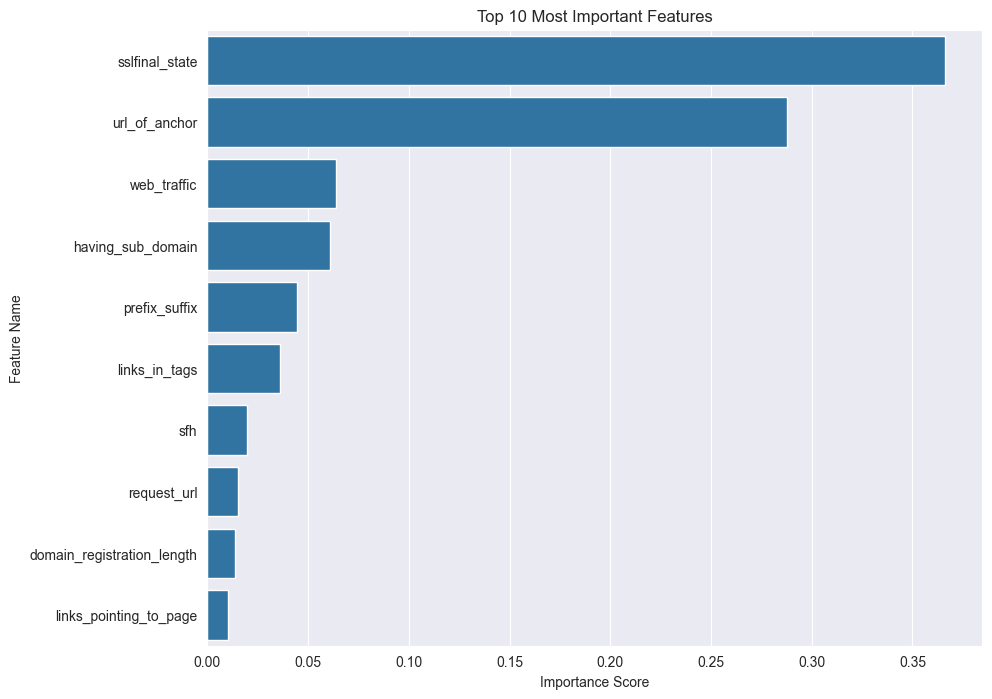

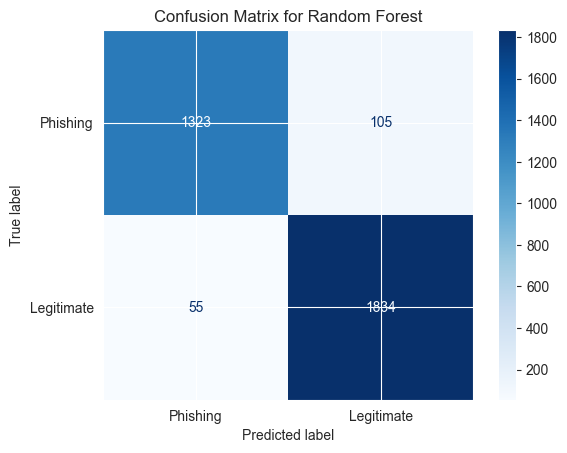


--- Evaluation Metrics for the Random Forest ---

Accuracy:  0.9518
Precision: 0.9458
Recall:    0.9709
F1 Score:  0.9582


In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)

# --- 1. Train the Final Random Forest Model ---
# Using the hyperparameters you selected
final_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
final_rf_model.fit(X_train, y_train)
y_pred = final_rf_model.predict(X_test)

# --- 2. Calculate and Visualize Feature Importances ---

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# --- 3. Display Confusion Matrix and Key Metrics ---

# Create and display the confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show() # Forces the plot to display here

# Print the evaluation metrics
print("\n--- Evaluation Metrics for the Random Forest ---\n")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")




The feature importance visualization confirms that the SSL Certificate (`SSLfinal_State`) and URL Anchors (`URL_of_Anchor`) are the two most important features by a significant margin. This finding directly correlates with the manual instructions derived from our initial decision tree.

According to the confusion matrix:

* 105 Phishing sites were misclassified as Legitimate (False Positives). This represents an error rate of approximately 7.3% for the phishing class.
* 55 Legitimate sites were misclassified as Phishing (False Negatives).

In total, the model made 3,157 correct predictions. Which is slightly better than small single tree that we had above.

## 5. Evaluation

Let's compare the performance of the two models side-by-side.

| Metric    | Decision Tree | Random Forest |
|-----------|---------------|---------------|
| Accuracy  | 0.9171        | 0.9518        |
| Precision | 0.9279        | 0.9458        |
| Recall    | 0.9264        | 0.9709        |

**Analysis:**
The Random Forest model demonstrates superior performance compared to the single Decision Tree across all evaluated metrics.
* The **Accuracy** is higher, indicating more correct predictions overall.
* The **Precision** is higher, meaning the model makes fewer false positive errors.
* The **Recall** has major improvements, which shows the Random Forest is substantially better at identifying actual phishing sites and letting fewer malicious sites slip through <del>or we just made too small tree in the first part</del>.

Conclusion:

While the simple Decision Tree offers a transparent and easily understandable model, the Random Forest delivers significantly better predictive performance, making it the more suitable choice for a robust, automated detection system.

However, it is important to acknowledge that this comparison is not perfectly direct. We intentionally limited the complexity of our Decision Tree (max_depth=3) to prioritize interpretability, whereas the Random Forest is an ensemble of much more complex trees (max_depth=10). While the Random Forest is clearly more powerful, its performance advantage is partly due to this intentional difference in model complexity.

## 6. Deployment

### Model Recommendation
For the purpose of building an automated system to warn users about potential phishing websites, the Random Forest model is the recommended choice. Its higher accuracy, precision, and recall mean it will provide more reliable protection for users. Meanwhile, the single Decision Tree was very useful for creating simple, manual instructions.

### Project Limitations and Future Work
This project successfully meets its educational objectives. However, to prepare this model for a real-world deployment, several important next steps would be required:

* **Exhaustive Hyperparameter Tuning:** A more comprehensive tuning process is needed. This would involve testing a wider range of hyperparameters (such as `min_samples_leaf` for the Random Forest and `ccp_alpha` for the Decision Tree) to ensure both models are performing at their absolute best. This would also allow for a fairer performance comparison between a fully optimized Decision Tree and a fully optimized Random Forest.

* **Use of a Three-Set Split (Train/Validation/Test):** For simplicity, we split our data into only two sets: training and testing. In a real-world scenario, a three-set split is standard practice. The validation set is used during hyperparameter tuning to find the best model, and the test set is kept completely separate until the very end to get a final, unbiased measure of how the model will perform on brand new, unseen data.